In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# KLASIFIKACIJA stablima odlucivanja

Za svaku supstancu postoji vise klasa koje mogu da se klasifikuju, stoga radice se klasifikacija svake supstance posebno

### UCITAVANJE I PREPROCESIRANJE PODATAKA
*deo koda uzet iz fajla za analizu podataka*

In [9]:
sirovi_podaci = pd.read_csv('drug_consumption.data')
sirovi_podaci #fale imena atributa

#procitano sa sajtu podataka 
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

sirovi_podaci = pd.read_csv('drug_consumption.data', names = kolone)

podaci = sirovi_podaci.copy()

#ID mi ne igra nikakvu ulogu svakako
podaci = podaci.drop('ID', axis = 1)


In [10]:
podaci
print(f'Broj istanci: {podaci.shape[0]}')
print(f'Broj atributa: {podaci.shape[1]}')
podaci.describe()

Broj istanci: 1885
Broj atributa: 31


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [11]:
podaci.isna().any().any() #nema nedostajucih vrednosti, sto je dobro

False

In [12]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Alchocol':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS'], 

In [13]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Alchocol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], 
True


In [7]:
#skaliramo podatke
def skaliraj_podatke(X):
    return (X - min(X))/(max(X) - min(X))

In [72]:
# skalirani_podaci = podaci.copy()
# for a in atributi:
#     skalirani_podaci[a] = skaliraj_podatke(skalirani_podaci[a])
    
# #provera uspesnosti skaliranja
# for a in atributi:
#     print(len(skalirani_podaci[a].unique()) == len(podaci[a].unique()), end = ", ")
    
# #nismo izgubili podatke

In [14]:
skalirani_podaci = podaci.copy()

# KLASIFIKACIJA 

In [15]:
# klase su poprilicno nebalnsirane...

In [16]:
# POMOCNA FJA ZA GRAFICKI PRIKAZ, kod uzet sa vezbi
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored, cprint

def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
#     vrste = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    kolone = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns = kolone, index = kolone))
    print("---------------------------------------------------------------------------------")

def report(model, x, y, text = "trening", ):
    y_pred = model.predict(x)
    
    print(colored('\t' + f'Klasifikacioni izveštaj za model {type(model).__name__} nad {text} podacima', 'blue', attrs= ['bold']))
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])
    cprint(classification_report(y, y_pred), attrs= ['dark']) 
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])

In [17]:
#provera klasifikacije nad jednom klasom (za sad)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
podaci_bez_klasa = skalirani_podaci.copy()
for x in klase:
    podaci_bez_klasa = podaci_bez_klasa.drop(x, axis = 1)
podaci_bez_klasa.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [19]:
klasa = podaci[klase[0]]
print(podaci_bez_klasa.shape, end = " ")
print(klasa.shape)

(1885, 12) (1885,)


In [20]:
# treba izvrsiti balansiranje podataka, zasad pokusavam bez nad prvom klasom
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)

In [21]:
print(X_train.shape, X_test.shape)

(1319, 12) (566, 12)


In [22]:
# nakon particionisanja podataka kreiramo model
drvo_klasifikacije = DecisionTreeClassifier()
drvo_klasifikacije.fit(X_train, y_train)

DecisionTreeClassifier()

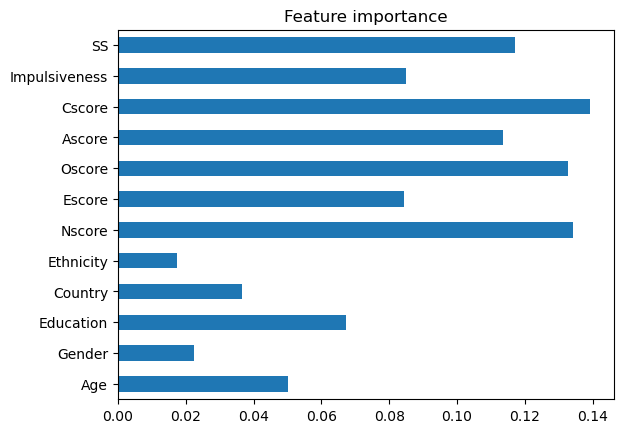

In [23]:
pd.Series(drvo_klasifikacije.feature_importances_, index=podaci_bez_klasa.columns).plot.barh()
plt.title("Feature importance")
plt.show()

 najbitniji atributi su lepo balansirani...

In [28]:
report_imbalanced(drvo_klasifikacije, X_train, y_train, "Train")

Classification report for model DecisionTreeClassifier on Train data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       1.00      1.00      1.00      1.00      1.00      1.00        24
        CL1       1.00      1.00      1.00      1.00      1.00      1.00        24
        CL2       1.00      1.00      1.00      1.00      1.00      1.00        48
        CL3       1.00      1.00      1.00      1.00      1.00      1.00       138
        CL4       1.00      1.00      1.00      1.00      1.00      1.00       201
        CL5       1.00      1.00      1.00      1.00      1.00      1.00       531
        CL6       1.00      1.00      1.00      1.00      1.00      1.00       353

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      1319

---------------------------------------------------------------------------------
Confusion matrix 

deluje da se preprilagodio...

In [29]:
report_imbalanced(drvo_klasifikacije, X_test, y_test, "Train")

Classification report for model DecisionTreeClassifier on Train data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       0.00      0.00      0.98      0.00      0.00      0.00        10
        CL1       0.00      0.00      0.99      0.00      0.00      0.00        10
        CL2       0.00      0.00      0.96      0.00      0.00      0.00        20
        CL3       0.13      0.13      0.89      0.13      0.34      0.11        60
        CL4       0.16      0.17      0.84      0.17      0.38      0.14        86
        CL5       0.46      0.40      0.68      0.43      0.52      0.26       228
        CL6       0.29      0.34      0.71      0.31      0.49      0.23       152

avg / total       0.30      0.29      0.75      0.30      0.44      0.20       566

---------------------------------------------------------------------------------
Confusion matrix 

radi uzasno lose

In [30]:
# pokusavam da promenim velicinu test/train skupova

from sklearn.metrics import accuracy_score
velicine_skupova = [1/6, 1/3, 0.3, 0.5, 0.67]

for i in range(5):
    
    X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = velicine_skupova[i] , stratify= klasa, random_state= 42)
    
    drvo_klasifikacije = DecisionTreeClassifier()
    drvo_klasifikacije.fit(X_train, y_train)
    
    pred = drvo_klasifikacije.predict(X_test)
    print(f'{round(velicine_skupova[i], 2)}: Preciznost {round(accuracy_score(y_test, pred), 2)}')
    #report(drvo_klasifikacije, X_tests[i], y_tests[i], text= 'test')
    


0.17: Preciznost 0.27
0.33: Preciznost 0.28
0.3: Preciznost 0.31
0.5: Preciznost 0.27
0.67: Preciznost 0.3


ni to nesto ne pomaze...

In [73]:
# pokusavam sa dummy podacima

In [76]:
klasa = pd.get_dummies(klasa)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)

In [79]:
drvo_klasifikacije = DecisionTreeClassifier()
drvo_klasifikacije.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
report(drvo_klasifikacije, X_train, y_train, "Train")

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad Train podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       531
           6       1.00      1.00      1.00       353

   micro avg       1.00      1.00      1.00      1319
   macro avg       1.00      1.00      1.00      1319
weighted avg       1.00      1.00      1.00      1319
 samples avg       1.00      1.00      1.00      1319

----------------------------------------------------------------------------------------------


In [84]:
report(drvo_klasifikacije, X_test, y_test, "Test")

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad Test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.20      0.17        10
           1       0.00      0.00      0.00        10
           2       0.15      0.15      0.15        20
           3       0.10      0.10      0.10        60
           4       0.14      0.15      0.15        86
           5       0.43      0.40      0.41       228
           6       0.30      0.32      0.31       152

   micro avg       0.29      0.29      0.29       566
   macro avg       0.18      0.19      0.18       566
weighted avg       0.29      0.29      0.29       566
 samples avg       0.29      0.29      0.29       566

----------------------------------------------------------------------------------------------


nista bolje...

In [31]:
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)

In [112]:
# menjamo parametre
parametri =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 30)],
    'max_features': [x for x in range(3, 40)]
}

balansirano_drvo = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'), param_grid= parametri)

In [33]:
#pokusavamo sa balansiranim drvetom
balansirano_drvo.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24, 25, 26, 27, 28, 29, 30, 31,
                                          32, ...]})

In [34]:
print(balansirano_drvo.best_params_)
print(balansirano_drvo.best_score_)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 9}
0.3123257287705957


In [71]:
najbolji_parametri = balansirano_drvo.best_params_
print(najbolji_parametri)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 9}


In [36]:
report_imbalanced(balansirano_drvo.best_estimator_, X_test, y_test, 'test')

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       0.00      0.00      0.98      0.00      0.00      0.00        10
        CL1       0.00      0.00      0.98      0.00      0.00      0.00        10
        CL2       0.12      0.15      0.96      0.13      0.38      0.13        20
        CL3       0.16      0.18      0.89      0.17      0.40      0.15        60
        CL4       0.17      0.19      0.84      0.18      0.40      0.15        86
        CL5       0.45      0.39      0.67      0.42      0.51      0.26       228
        CL6       0.28      0.28      0.73      0.28      0.45      0.20       152

avg / total       0.30      0.29      0.76      0.29      0.45      0.20       566

---------------------------------------------------------------------------------
Confusion matrix f

In [90]:
klasa = podaci['Alchocol']

##  balansiranje

In [91]:
# kod uzet sa casa
from collections import Counter
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    print(colored("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(Y).items()), "green"))
    print(colored("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()), "blue"))
    return X_resampled, y_resampled
    

In [92]:
def visualize(X, X_resampled, Y, Y_resampled, x_opacity=0.5):
    """
        x_opacity - [0, 1] -> prozirnost elemenata klase (podešavati u odnosu na to da li prikazujemo samo 1 klasu ili obe)
    """
    
    #Da bismo vizuelizovali, iskoristicemo PCA da smanjimo na 2 dimenzije
    
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled) 
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, y_resampled]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:, 0], X_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title('{} resampling'.format("After" if i else "Before"), c = 'blue' if i else 'green')
    plt.show()

In [192]:
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test):
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=25, criterion='gini')
    model.fit(X_train, Y_train)
    report_imbalanced(model, X_train, Y_train)
    report_imbalanced(model, X_test, Y_test)
    return model

In [193]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

In [194]:
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)

Number of instances before resampling with RandomOverSampler : dict_items([('CL5', 531), ('CL4', 201), ('CL6', 353), ('CL3', 138), ('CL2', 48), ('CL1', 24), ('CL0', 24)]). 
Number of instances after  resampling with RandomOverSampler : dict_items([('CL5', 531), ('CL4', 201), ('CL6', 353), ('CL3', 138), ('CL2', 48), ('CL1', 24), ('CL0', 531)]). 


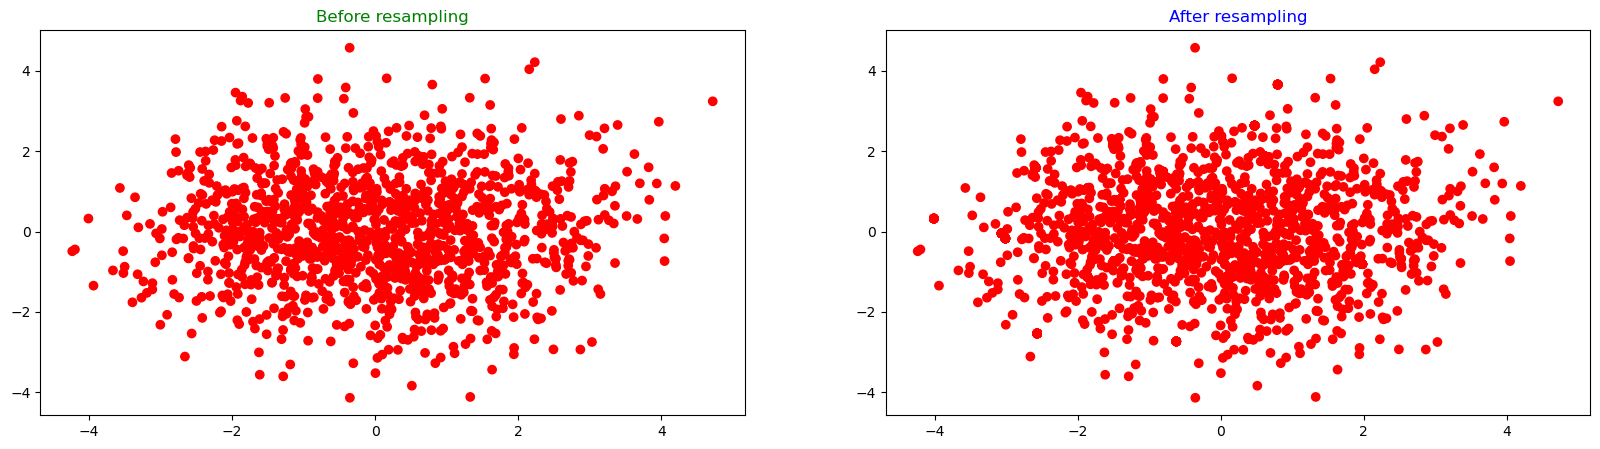

In [195]:
X_resampled, y_resampled = resample(ros, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [196]:
model_ros = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       0.90      1.00      0.95      0.95      0.98      0.96       531
        CL1       0.50      0.04      1.00      0.08      0.20      0.04        24
        CL2       0.44      0.15      0.99      0.22      0.38      0.13        48
        CL3       0.43      0.13      0.99      0.20      0.36      0.12       138
        CL4       0.44      0.17      0.97      0.24      0.41      0.15       201
        CL5       0.51      0.66      0.75      0.58      0.70      0.49       531
        CL6       0.39      0.47      0.83      0.43      0.62      0.37       353

avg / total       0.59      0.61      0.88      0.57      0.69      0.52      1826

---------------------------------------------------------------------------------
Confusion matr

In [197]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=10, random_state=42)

In [198]:
# k = [3, 5, 7, 10, 12, 15, 17, 23]

# for x in k:
#     smote = SMOTE(k_neighbors = x, random_state = 42)
#     X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)
#     X_resampled, y_resampled = resample(smote, X_train, y_train)
#     visualize(X_train, X_resampled, y_train, y_resampled, 0)

#     model = DecisionTreeClassifier(max_depth=7, min_samples_split=25, criterion='gini')
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
    
#     print(f'{x}: Preciznost {round(accuracy_score(y_test, pred), 2)}')

Number of instances before resampling with SMOTE : dict_items([('CL5', 531), ('CL4', 201), ('CL6', 353), ('CL3', 138), ('CL2', 48), ('CL1', 24), ('CL0', 24)]). 
Number of instances after  resampling with SMOTE : dict_items([('CL5', 531), ('CL4', 531), ('CL6', 531), ('CL3', 531), ('CL2', 531), ('CL1', 531), ('CL0', 531)]). 


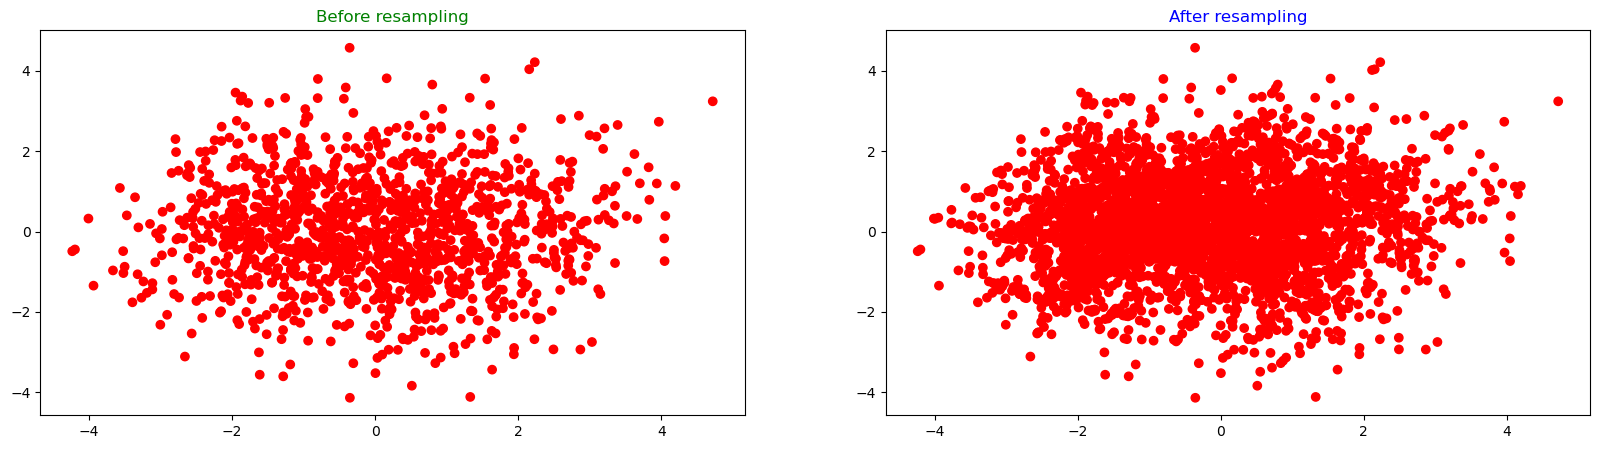

In [199]:
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)
X_resampled, y_resampled = resample(smote, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [200]:
model_smote = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       0.83      0.81      0.97      0.82      0.89      0.78       531
        CL1       0.69      0.86      0.94      0.77      0.90      0.80       531
        CL2       0.61      0.66      0.93      0.64      0.79      0.60       531
        CL3       0.41      0.39      0.91      0.40      0.59      0.33       531
        CL4       0.40      0.50      0.88      0.45      0.66      0.42       531
        CL5       0.48      0.39      0.93      0.43      0.60      0.34       531
        CL6       0.47      0.33      0.94      0.39      0.56      0.29       531

avg / total       0.56      0.56      0.93      0.56      0.71      0.51      3717

---------------------------------------------------------------------------------
Confusion matr

In [209]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

## balansiranje klasa nije pripomoglo...

## pokusavam da klasifikujem svaku klasu sad... (mozda je problem samo u ovoj klasi)

In [106]:
#pravi skupove podataka pojedinacno bez svake klase
podaci_bez_klase = []
for x in atributi:
    podaci_bez_klase.append(podaci_bez_klasa.drop(x, axis = 1))
    
#klasni_podaci, isto to
klasni_podaci = []
n = len(klase)
for i in range(n):
    klasni_podaci.append(podaci[klase[i]])
# klasni_podaci[12]

In [107]:
#delimo podatke na train/test skupove
X_trains, X_tests, y_trains, y_tests = [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)]
n = len(klase)
for i in range(n):
    X_trains[i], X_tests[i], y_trains[i], y_tests[i] = train_test_split(podaci_bez_klasa, klasni_podaci[i], test_size = 0.30,  random_state = 42)
#proverimo podatke (dobri su)
for i in range(n):
    print(X_trains[i].shape != X_trains[0].shape, end = ' ')


False False False False False False False False False False False False False False False False False False False 

In [108]:
# prvo pravimo stablo za svakog, i proveramo uspesnost

for i in range(n):
    drvo_klasifikacije = DecisionTreeClassifier()
    drvo_klasifikacije.fit(X_trains[i], y_trains[i])
    print(klase[i])
    report(drvo_klasifikacije, X_tests[i], y_tests[i], text= 'test')

Alchocol
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00        11
         CL1       0.08      0.09      0.08        11
         CL2       0.11      0.08      0.10        24
         CL3       0.13      0.13      0.13        60
         CL4       0.26      0.18      0.21        96
         CL5       0.41      0.42      0.41       229
         CL6       0.28      0.36      0.31       135

    accuracy                           0.30       566
   macro avg       0.18      0.18      0.18       566
weighted avg       0.30      0.30      0.30       566

----------------------------------------------------------------------------------------------
Amphet
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
-----------------------------------------------

              precision    recall  f1-score   support

         CL0       0.68      0.65      0.66       321
         CL1       0.27      0.26      0.26        77
         CL2       0.17      0.18      0.18        55
         CL3       0.24      0.24      0.24        68
         CL4       0.14      0.14      0.14        29
         CL5       0.04      0.08      0.06        13
         CL6       0.00      0.00      0.00         3

    accuracy                           0.46       566
   macro avg       0.22      0.22      0.22       566
weighted avg       0.47      0.46      0.47       566

----------------------------------------------------------------------------------------------
Meth
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.82      0.80      0.81       424
         CL1       0.00 

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

In [113]:
#BALANSIRANO DRVO, SA PODESENIM PARAMETRIMA
preciznosti = []
for i in range(n):
    balansirano_drvo.fit(X_trains[i], y_trains[i])
    print(f'{klase[i]}: {balansirano_drvo.best_score_}')
    preciznosti.append(balansirano_drvo.best_score_)

Alchocol: 0.3138668049314437
Amphet: 0.41696912086645926


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Amyl: 0.5754349579444635
Benzos: 0.40411625763336795
Caff: 0.5905893536121674
Canabis: 0.3108134577716327


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Choc: 0.38667185159580597
Coke: 0.45638322387371816


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Crack: 0.7824317317663325
Ecstasy: 0.45111764028113843
Heroin: 0.7748674962553289


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Ketamin: 0.6853929024081115
LegalH: 0.5352776817605716
LSD: 0.5170728194492453
Meth: 0.6724881898836271
Mushrooms: 0.47837884548911164
Nicotine: 0.2820284594999424


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Semer: 0.9954516649383571
VSA: 0.6671822790644083


In [ ]:
# ne radi bas najbolje za sve

In [131]:
balansirane_preciznosti = [round(x, 2) for x in preciznosti]

# pokusavam da dodam atribute koristeci i ostale klase

In [118]:
podaci_skalirano = podaci.copy()

n = len(podaci_skalirano['Heroin'])
    
for x in klase:
    for i in range(n):
        podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))
    print(podaci_skalirano[x].unique())
        

podaci_skalirano

[5 6 4 2 1 0 3]
[2 0 1 3 5 4 6]
[0 2 1 3 5 4 6]
[2 0 3 1 4 5 6]
[6 5 4 3 0 1 2]
[0 4 3 2 1 6 5]
[5 6 4 0 3 2 1]
[0 3 2 1 6 5 4]
[0 1 2 3 5 4 6]
[0 4 1 3 2 6 5]
[0 1 2 3 5 6 4]
[0 2 3 1 5 4 6]
[0 1 2 3 5 4 6]
[0 2 1 3 4 5 6]
[0 3 1 6 4 2 5]
[0 1 2 3 4 5 6]
[2 4 0 6 1 3 5]
[0 2 3 4 1]
[0 1 3 6 2 5 4]


/tmp/ipykernel_5428/2619896397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,3,3,0,0,0,0,5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,2,0,0,3,5,4,4,5,0,0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,4,0,2,0,2,0,2,6,0,0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,3,0,0,3,3,0,3,4,0,0


In [119]:
# treba mi za klasifikaciju
for x in klase:
    podaci_skalirano[x] = podaci_skalirano[x].astype('float64')
    
# podaci_skalirano.dtypes

In [120]:
# #skaliram podatke
# for a in atributi:
#     podaci_skalirano[a] = skaliraj_podatke(podaci_skalirano[a])
# for a in klase:
#     podaci_skalirano[a] = skaliraj_podatke(podaci_skalirano[a])
# podaci_skalirano.describe()

In [121]:
#pravi skupove podataka pojedinacno bez svake klase
podaci_bez_klase = []
for x in klase:
    podaci_bez_klase.append(podaci_skalirano.drop(x, axis = 1))
    
#klasni_podaci, isto to
klasni_podaci = []
n = len(klase)
for i in range(n):
    klasni_podaci.append(podaci[klase[i]])
    
len(podaci_bez_klase)

19

In [122]:
#delimo podatke na train/test skupove
n = len(podaci_bez_klase)
X_trains, X_tests, y_trains, y_tests = [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)]
for i in range(n):
    X_trains[i], X_tests[i], y_trains[i], y_tests[i] = train_test_split(podaci_bez_klase[i], klasni_podaci[i], test_size = 0.30,  random_state = 42)

#proverimo podatke (dobri su)
# for i in range(n):
#     print(X_trains[i].shape != X_trains[0].shape, end = ' ')
    
#y_trains[i]

In [123]:
from sklearn.tree import DecisionTreeClassifier
drvo_klasifikacije = DecisionTreeClassifier()
drvo_klasifikacije.fit(X_trains[0], y_trains[0])

DecisionTreeClassifier()

In [124]:
report(drvo_klasifikacije, X_tests[0], y_tests[0], text= 'test')

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00        11
         CL1       0.12      0.09      0.11        11
         CL2       0.19      0.19      0.19        26
         CL3       0.12      0.13      0.12        63
         CL4       0.26      0.22      0.24       111
         CL5       0.45      0.43      0.44       254
         CL6       0.26      0.33      0.29       147

    accuracy                           0.31       623
   macro avg       0.20      0.20      0.20       623
weighted avg       0.32      0.31      0.31       623

----------------------------------------------------------------------------------------------


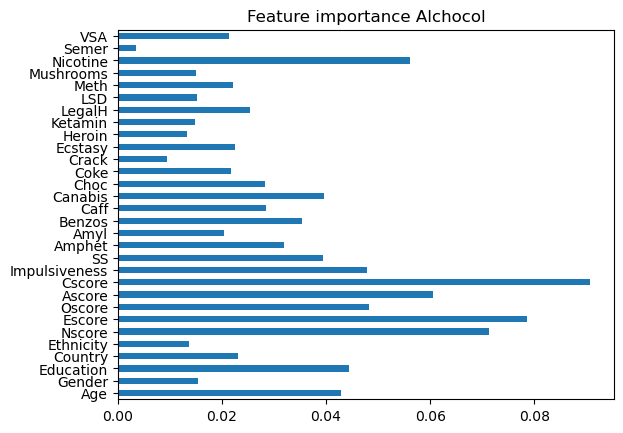

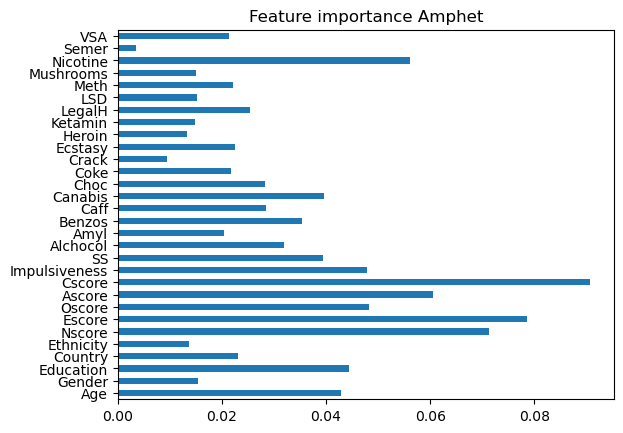

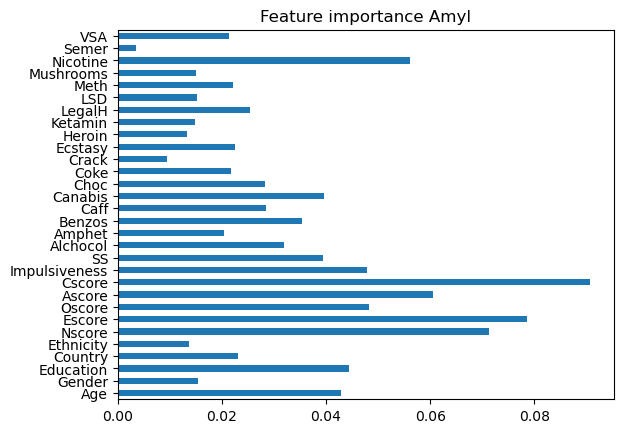

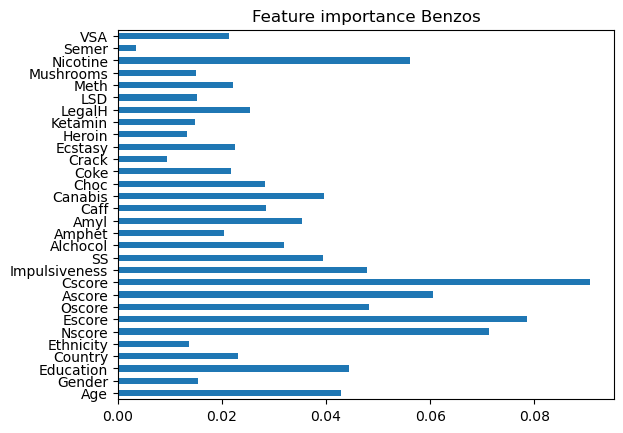

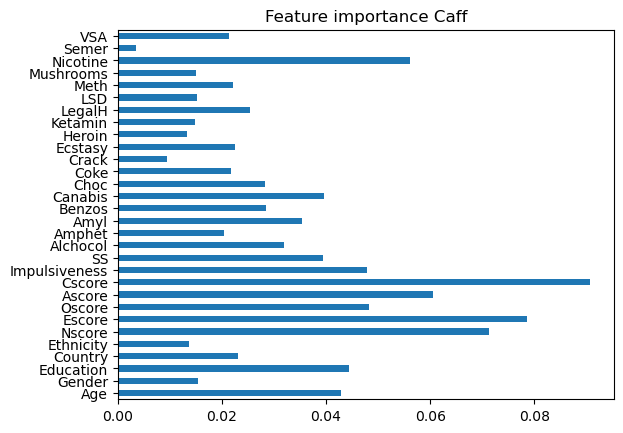

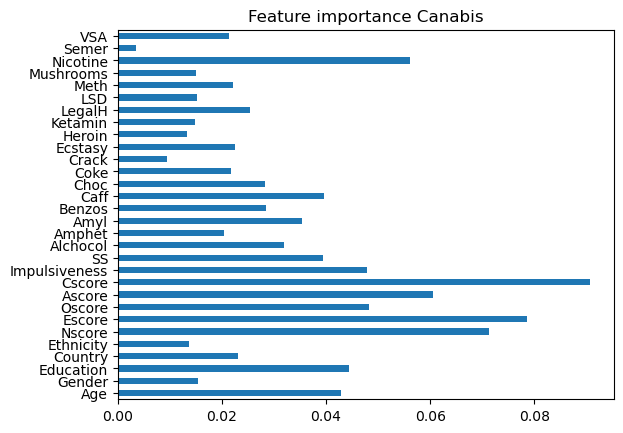

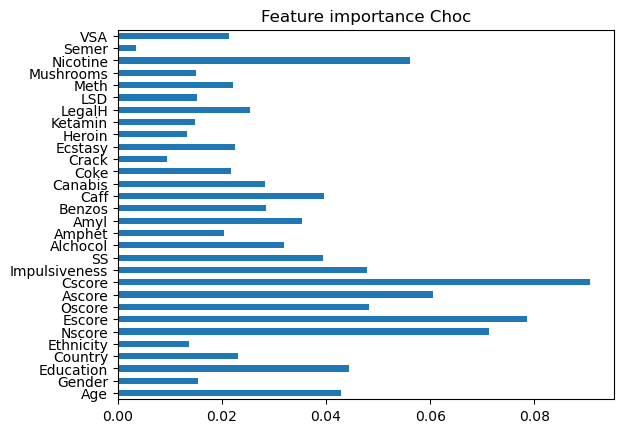

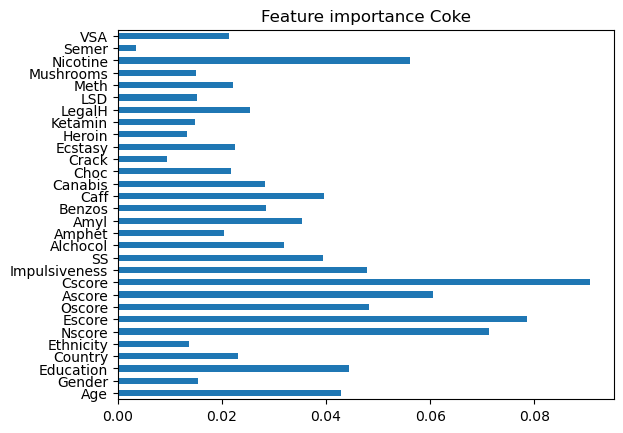

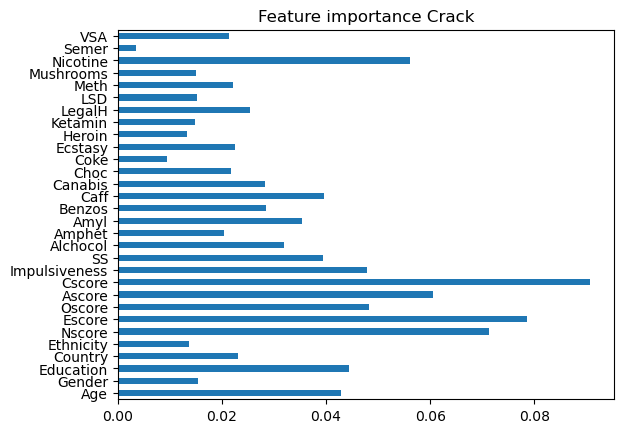

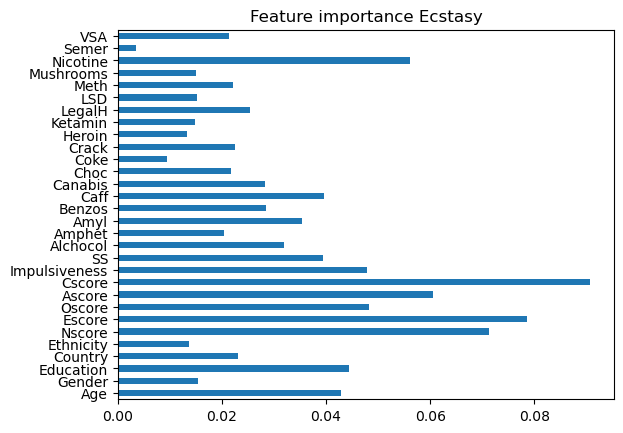

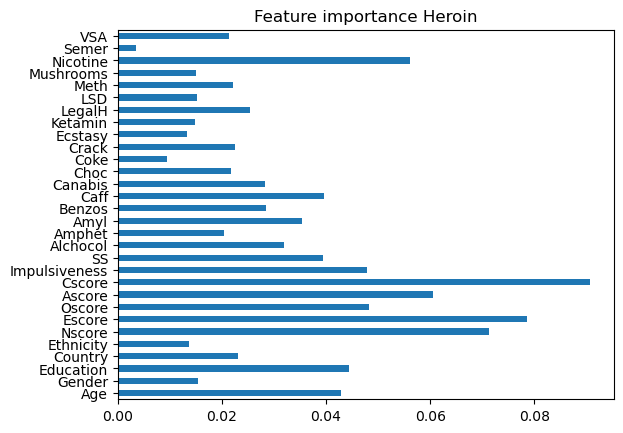

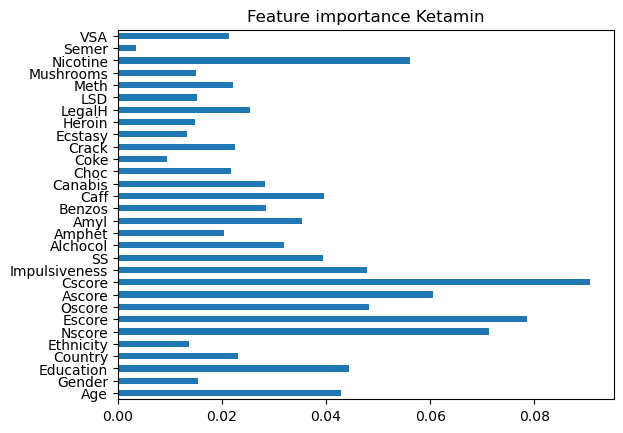

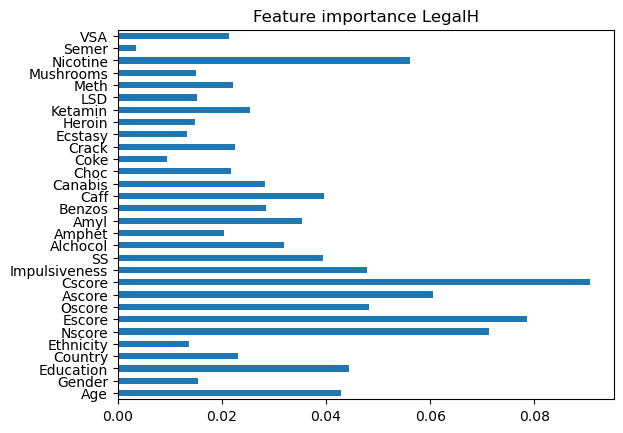

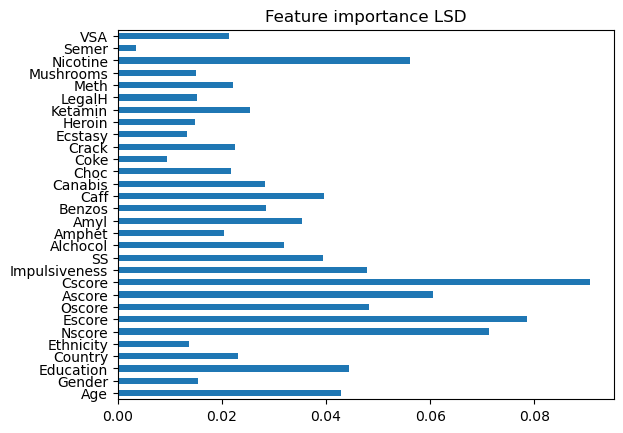

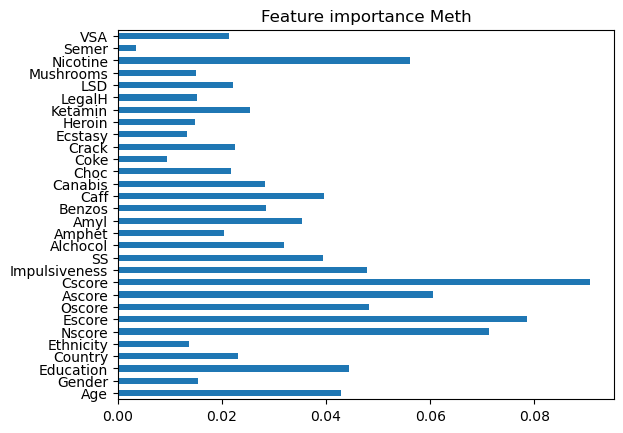

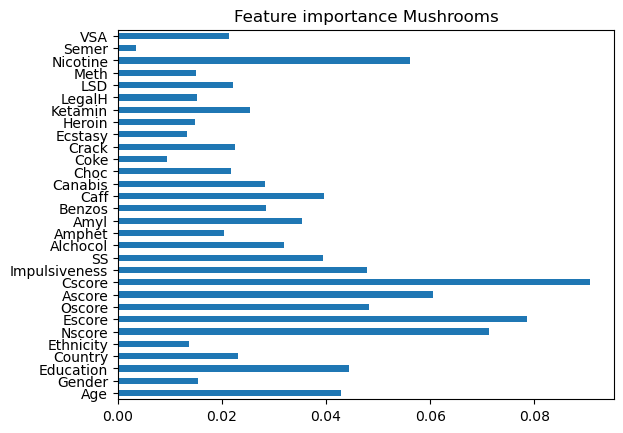

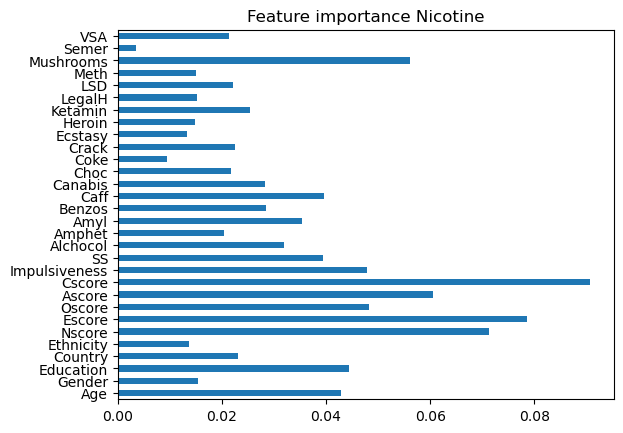

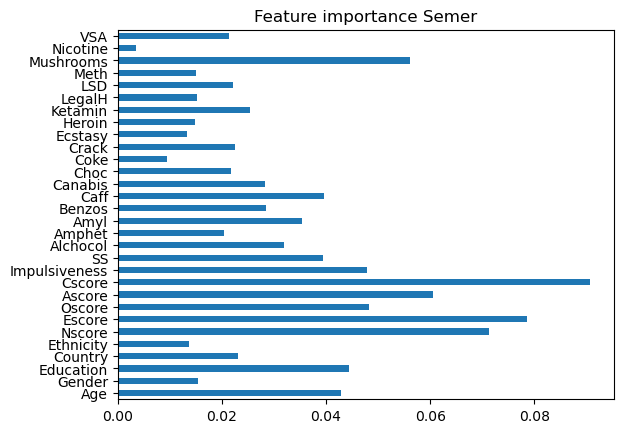

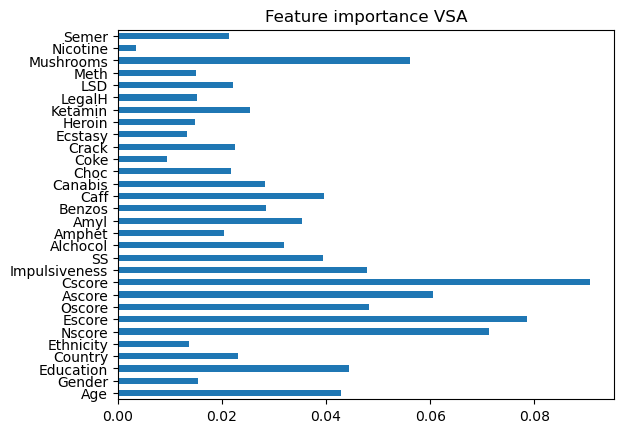

In [126]:
for i in range(n):
    pd.Series(drvo_klasifikacije.feature_importances_, index=podaci_bez_klase[i].columns).plot.barh()
    plt.title(f'Feature importance {klase[i]}')
    plt.show()

In [128]:
preciznosti_klase = []
from sklearn.metrics import accuracy_score
for i in range(n):
    drvo_klasifikacije = DecisionTreeClassifier()
    drvo_klasifikacije.fit(X_trains[i], y_trains[i])
    
    pred = drvo_klasifikacije.predict(X_tests[i])
    preciznosti_klase.append(round(accuracy_score(y_tests[i], pred), 2))
    print(f'{klase[i]}: {round(accuracy_score(y_tests[i], pred), 2)}')
    #report(drvo_klasifikacije, X_tests[i], y_tests[i], text= 'test')

Alchocol: 0.31
Amphet: 0.53
Amyl: 0.65
Benzos: 0.44
Caff: 0.54
Canabis: 0.34
Choc: 0.34
Coke: 0.56
Crack: 0.82
Ecstasy: 0.56
Heroin: 0.81
Ketamin: 0.7
LegalH: 0.53
LSD: 0.62
Meth: 0.66
Mushrooms: 0.56
Nicotine: 0.31
Semer: 0.99
VSA: 0.65


In [49]:
# pokusavam sa balansiranim drvetom

In [50]:
# menjamo parametre
parametri =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 30)],
    'max_features': [x for x in range(3, 40)]
}

balansirano_drvo = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'), param_grid= parametri)
nebalansirano_drvo = GridSearchCV(DecisionTreeClassifier(), param_grid= parametri)

In [51]:
#BALANSIRANO DRVO, SA PODESENIM PARAMETRIMA
for i in range(n):
    balansirano_drvo.fit(X_trains[i], y_trains[i])
    print(f'{klase[i]}: {balansirano_drvo.best_score_}')

Alchocol: 0.32334211682037767
Amphet: 0.5625980299893344


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Amyl: 0.6521331325679152
Benzos: 0.4634952004517222
Caff: 0.5831921701486918
Canabis: 0.3969979296066252


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Choc: 0.37956584478323613
Coke: 0.597459062676454


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Crack: 0.8304630152456239
Ecstasy: 0.5784396762657632
Heroin: 0.8209392057218144


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Ketamin: 0.7456145303971391
LegalH: 0.5950812472551603
LSD: 0.6362914862914864
Meth: 0.706841709015622
Mushrooms: 0.6164784490871448
Nicotine: 0.3455266955266955


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Semer: 0.9960380199510634


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


VSA: 0.7060135516657257


In [60]:
# radi manjevise isto i sa podesenim atributima, znaci ne menja mnogo sta...

In [134]:
balansirane_preciznosti_klase = [0.32, 0.56, 0.65, 0.46, 0.57, 0.4, 0.38, 0.6, 0.83, 0.58, 0.82, 0.74, 0.6, 0.63,
                                0.71, 0.62, 0.35, 1.0, 0.71]

In [135]:
# preciznosti_klase, balansirane_preciznosti, balansirane_preciznosti_klase

In [136]:
len(preciznosti_klase) == len(balansirane_preciznosti) == len(balansirane_preciznosti_klase) 

True

In [142]:
n = len(preciznosti_klase)

## PCA

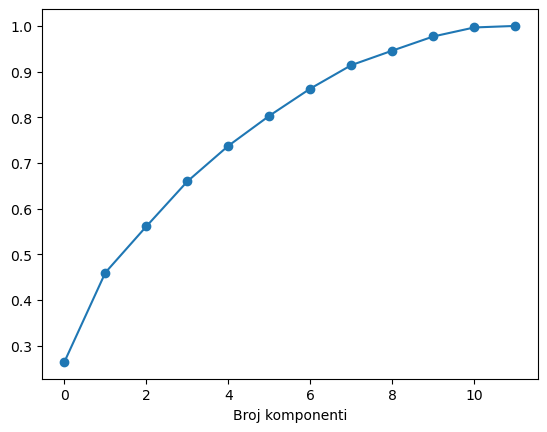

In [160]:
#samo atributi
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.show()

In [164]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(podaci_bez_klase[0], podaci['Alchocol'], test_size = 0.3, random_state = 42 )

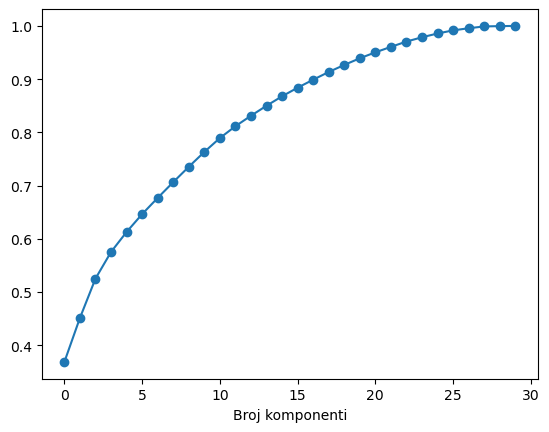

In [165]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train1)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.show()

PCA i ne pomaze nesto 

# REZULTATI

In [137]:
modeli = ["Obican sa svim klasama", "Balansiran", "Balansiran sa svim klasama"]

0


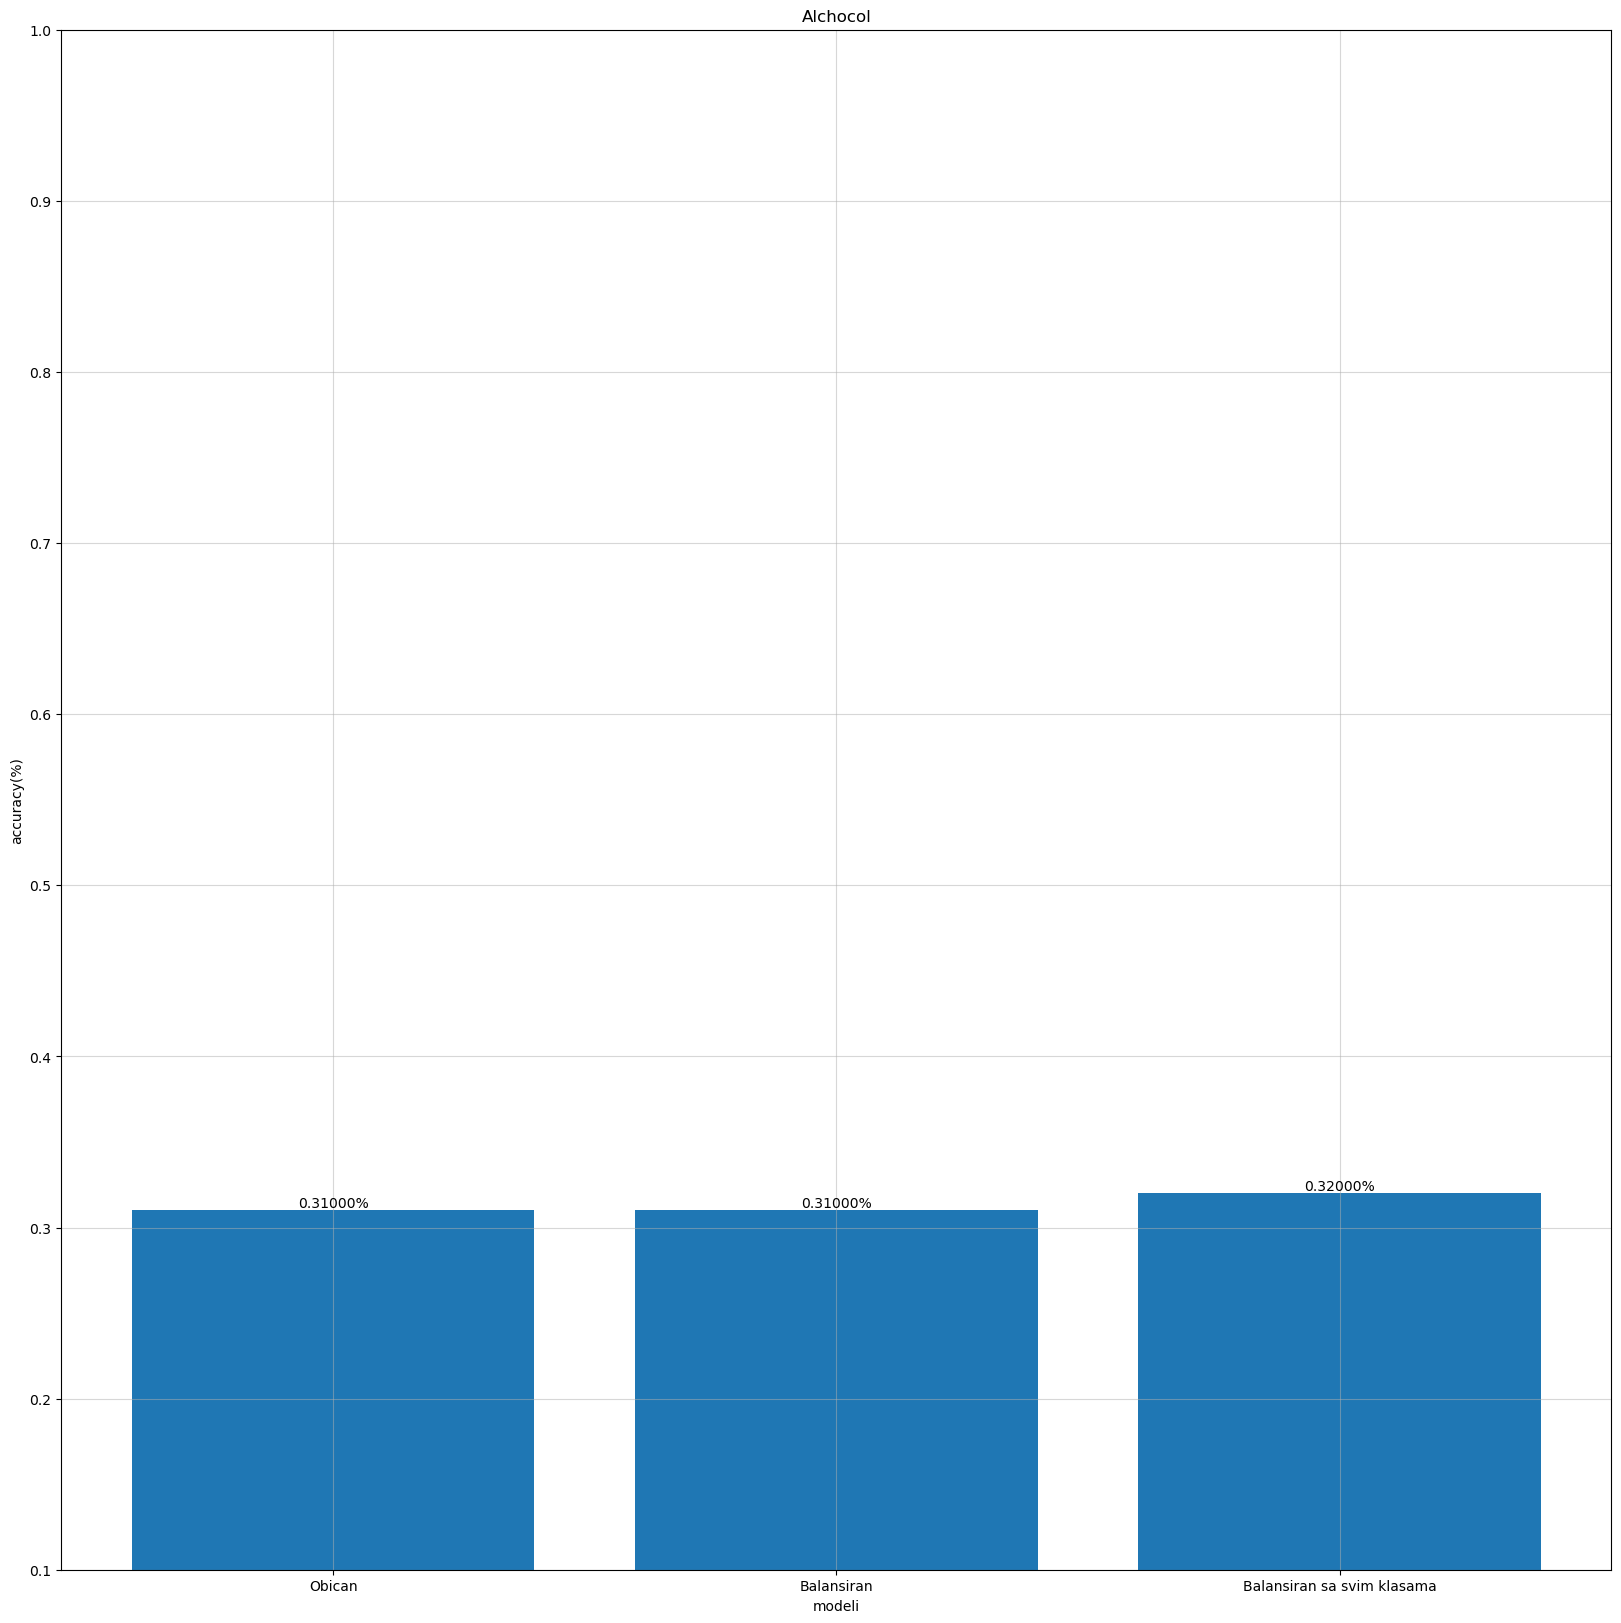

1


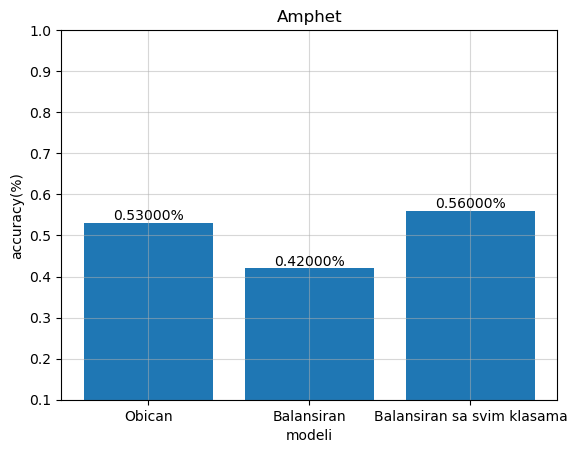

2


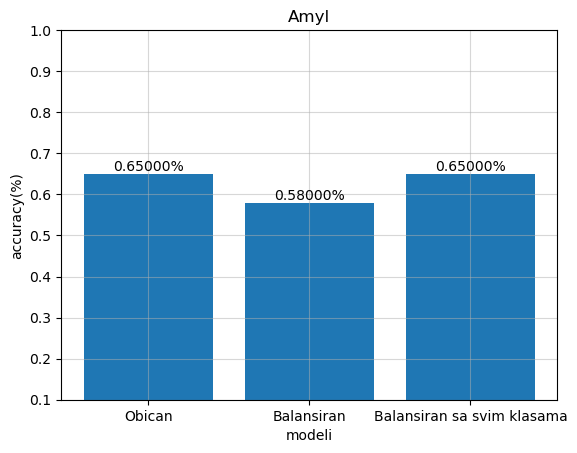

3


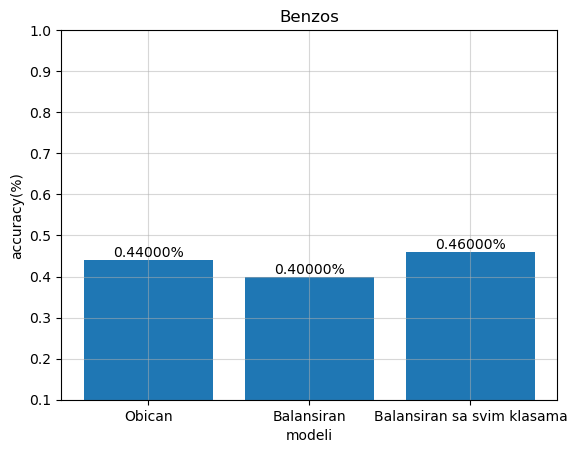

4


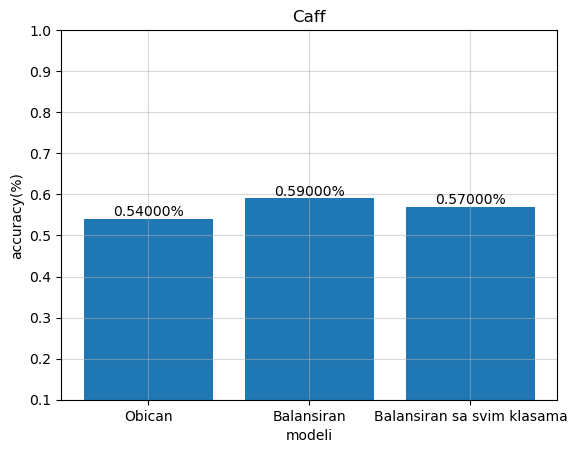

5


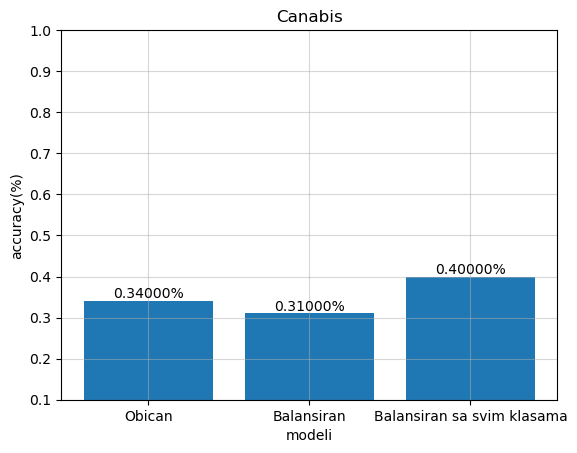

6


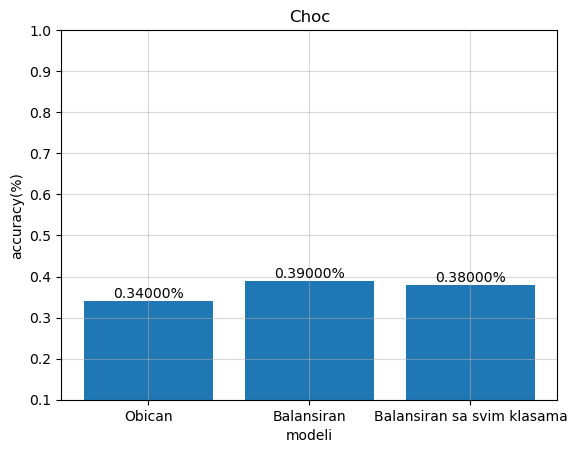

7


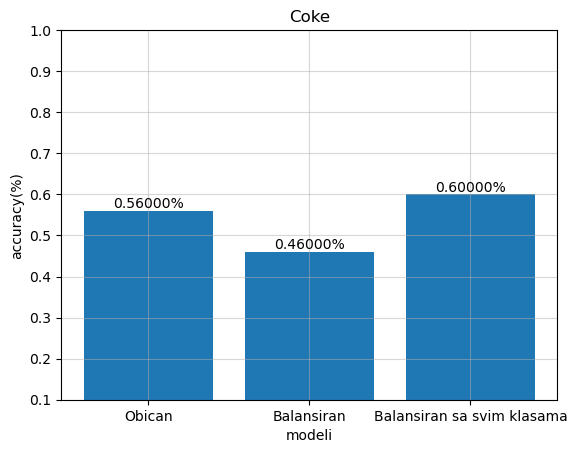

8


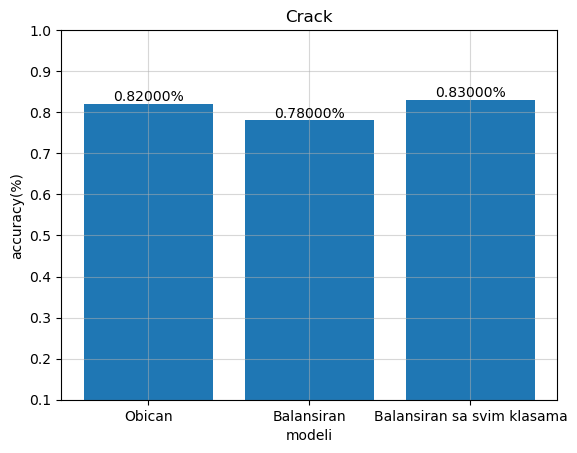

9


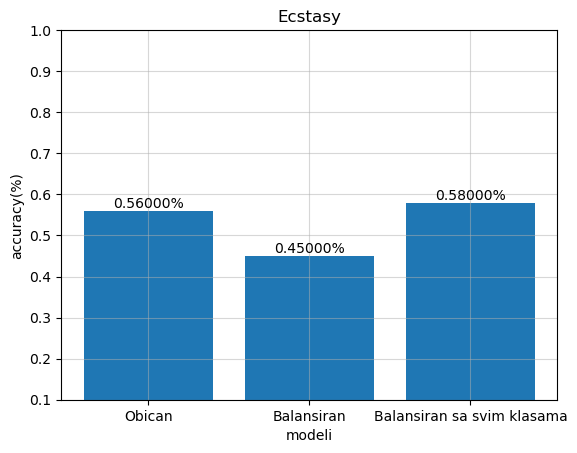

10


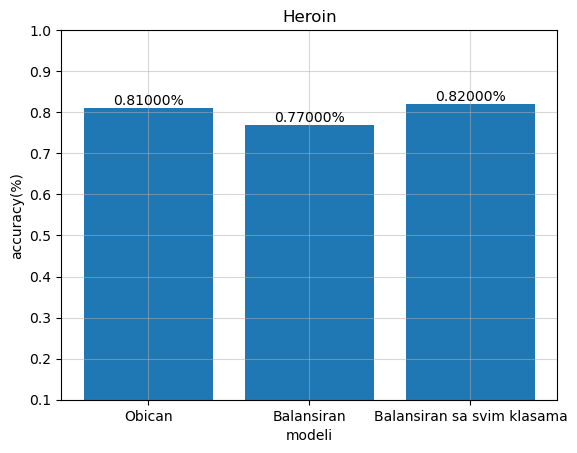

11


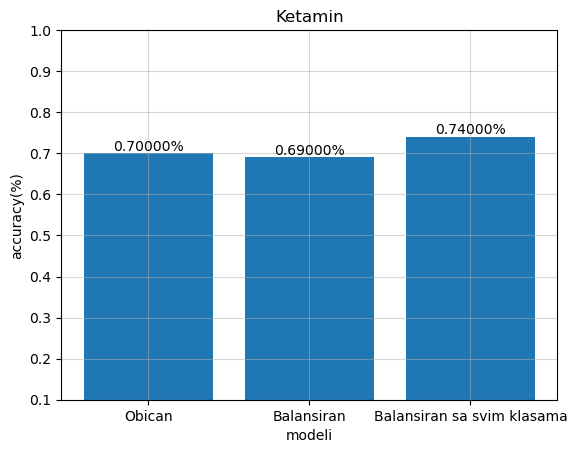

12


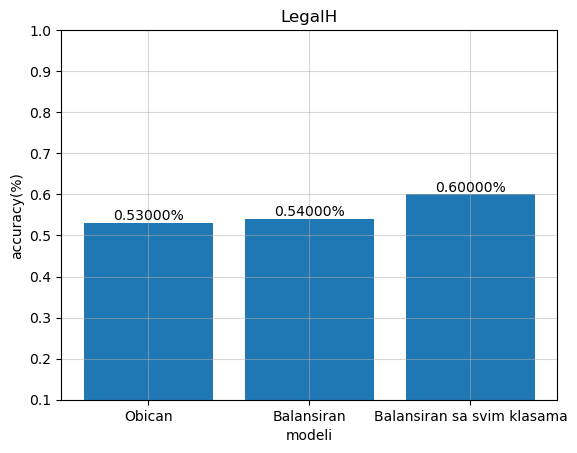

13


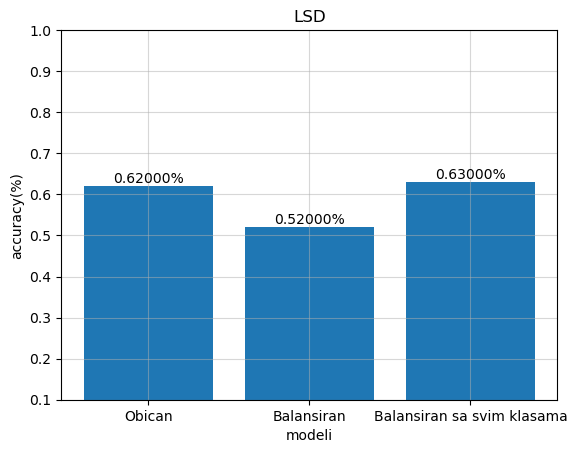

14


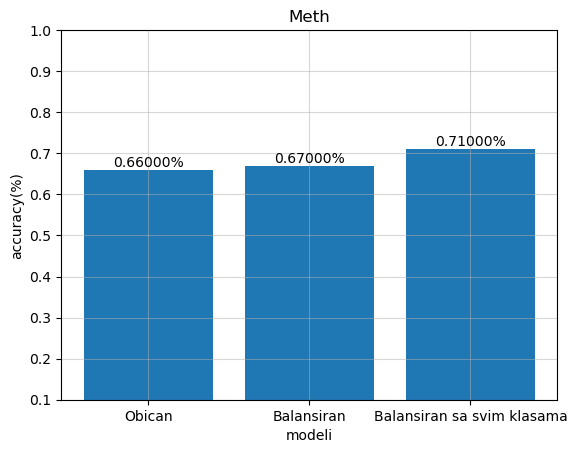

15


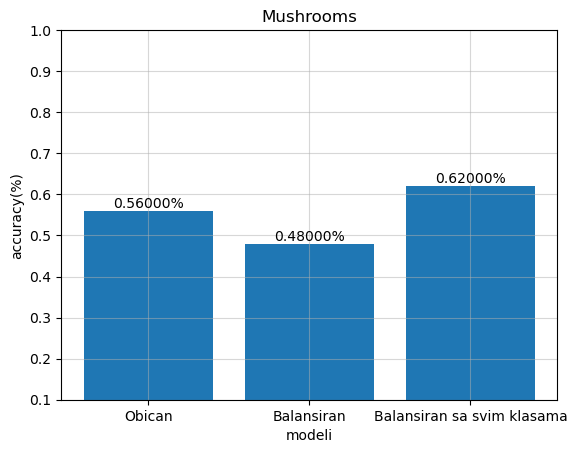

16


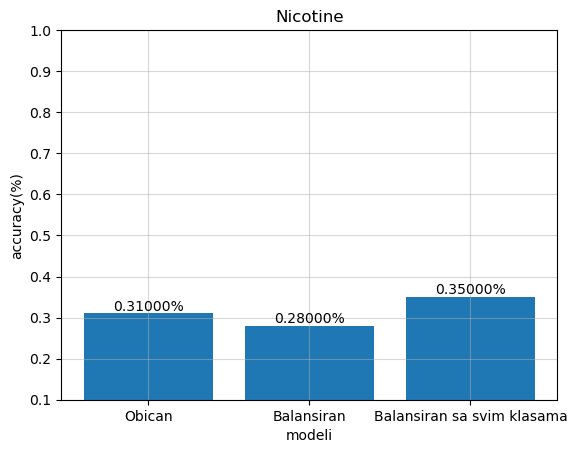

17


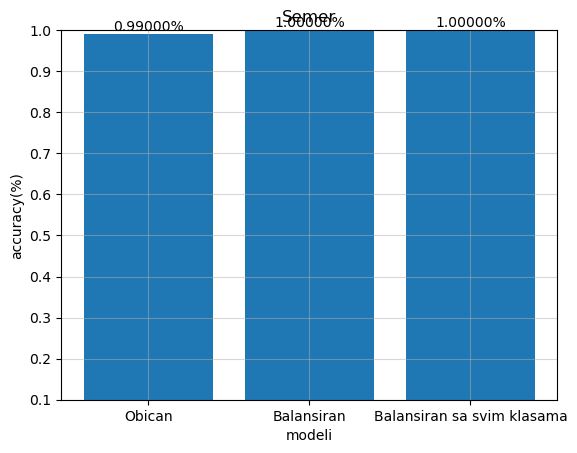

18


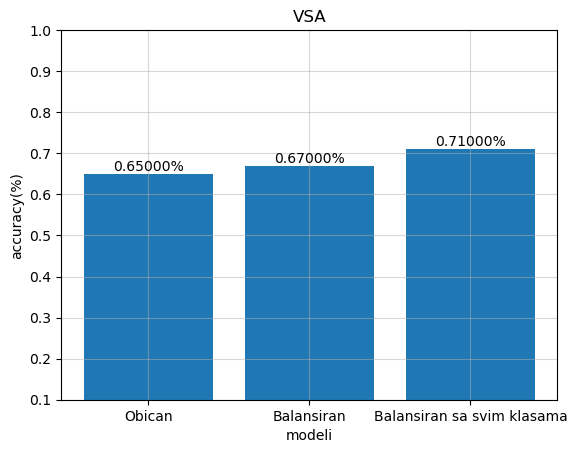

In [152]:
plt.figure(figsize = (20, 20))
for i in range(n):
    plt.title(f'{klase[i]}')
    vrednosti = [preciznosti_klase[i], balansirane_preciznosti[i], balansirane_preciznosti_klase[i]]
    plt.bar(modeli, vrednosti)
    plt.grid(alpha = 0.5)
    plt.ylim(0.1, 1.0)
    for j, s in enumerate(vrednosti):
        plt.text(modeli[j], s, f'{s:.5f}%', ha='center', va='bottom')
    plt.xlabel('modeli')
    plt.ylabel('accuracy(%)')
    plt.show()


In [154]:
def prosek(niz):
    return sum(niz) / len(niz)
proseci = [prosek(preciznosti_klase), prosek(balansirane_preciznosti), prosek(balansirane_preciznosti_klase)]

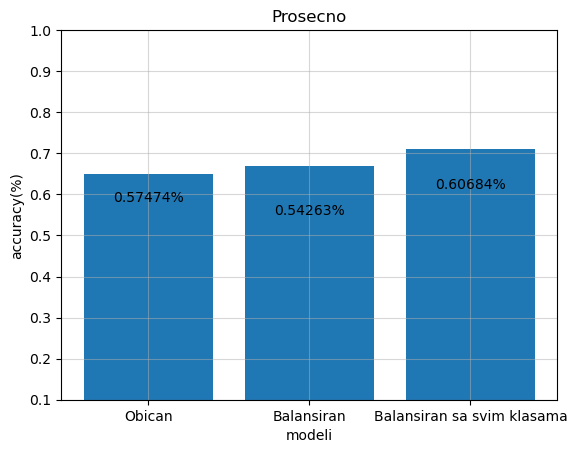

In [158]:
plt.title("Prosecno")
plt.bar(modeli, vrednosti)
plt.grid(alpha = 0.5)
plt.ylim(0.1, 1.0)
for j, s in enumerate(proseci):
    plt.text(modeli[j], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('modeli')
plt.ylabel('accuracy(%)')
plt.show()

In [166]:
najbolji_parametri

{'criterion': 'gini', 'max_depth': 17, 'max_features': 9}

In [167]:
najbolji_parametri1 = balansirano_drvo.best_params_

In [168]:
najbolji_parametri1

{'criterion': 'gini', 'max_depth': 19, 'max_features': 6}

In [169]:
# eksport modela
drvo = DecisionTreeClassifier(criterion = 'gini', max_depth = 19, max_features = 6)

In [171]:
import joblib
joblib.dump(drvo, 'Stablo.pkl')

['Stablo.pkl']